<a href="https://colab.research.google.com/github/ViniFogliarini/dnc_python/blob/main/Reg_Line_Mult_SKlearn_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
#Importe o arquivo formato xlsx
car_price = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Conhecendo os Dados

In [6]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car_price.describe()
# Nosso y sera o price

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
car_price.corr()

<ipython-input-8-93f38ccec8d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_price.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


### Fase Exploratória

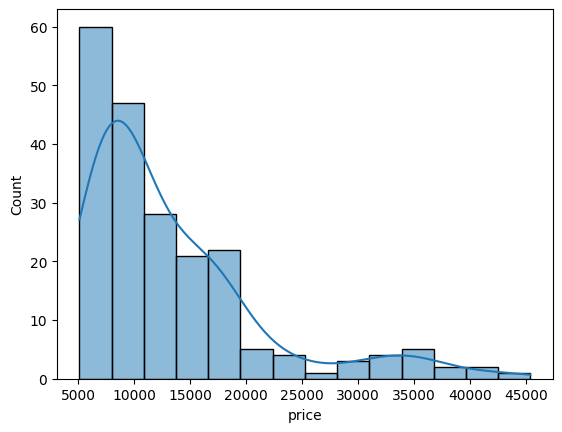

In [9]:
sns.histplot(car_price, x="price", kde=True);

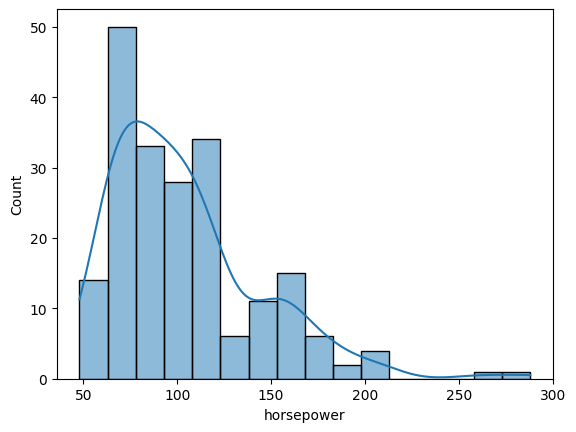

In [10]:
sns.histplot(car_price, x="horsepower", kde=True);

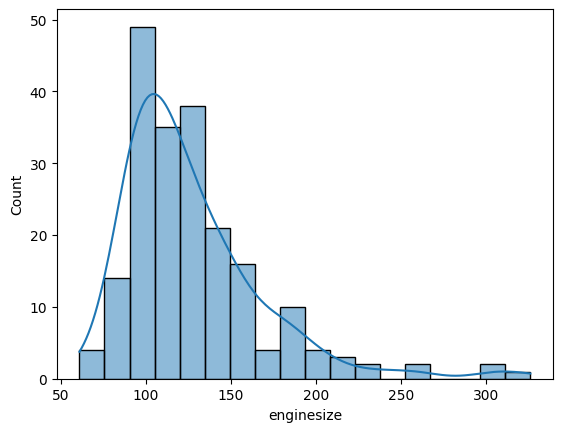

In [11]:
sns.histplot(car_price, x="enginesize", kde=True);

### Transformando em Numérica

In [15]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
from sklearn.preprocessing import LabelEncoder # Dummy com o SKlearn
le = LabelEncoder()

#CarName
le.fit(car_price.CarName)
car_price.CarName = le.transform(car_price.CarName)

#fueltype
le.fit(car_price.fueltype)
car_price.fueltype = le.transform(car_price.fueltype)

#aspiration
le.fit(car_price.aspiration)
car_price.aspiration = le.transform(car_price.aspiration)

#doornumber
le.fit(car_price.doornumber)
car_price.doornumber = le.transform(car_price.doornumber)

#carbody
le.fit(car_price.carbody)
car_price.carbody = le.transform(car_price.carbody)

#drivewheel
le.fit(car_price.drivewheel)
car_price.drivewheel = le.transform(car_price.drivewheel)

#enginelocation
le.fit(car_price.enginelocation)
car_price.enginelocation = le.transform(car_price.enginelocation)

#fuelsystem
le.fit(car_price.fuelsystem)
car_price.fuelsystem = le.transform(car_price.fuelsystem)

#enginetype
le.fit(car_price.enginetype)
car_price.enginetype = le.transform(car_price.enginetype)

#cylindernumber
le.fit(car_price.cylindernumber)
car_price.cylindernumber = le.transform(car_price.cylindernumber)


### Normalização

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


car_price_norm = pd.DataFrame(scaler.fit_transform(car_price), index=car_price.index, columns=car_price.columns)

In [20]:
car_price_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### OLS

In [21]:
import statsmodels.formula.api as smf

In [25]:
colunas = car_price_norm.columns
print(colunas)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [27]:
#modelo MRLS
function = 'price~symboling+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     57.84
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           5.74e-71
Time:                        19:26:15   Log-Likelihood:                 258.81
No. Observations:                 205   AIC:                            -469.6
Df Residuals:                     181   BIC:                            -389.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1298      0.201  

In [28]:
function = 'price~symboling+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     60.79
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           7.44e-72
Time:                        19:28:41   Log-Likelihood:                 258.79
No. Observations:                 205   AIC:                            -471.6
Df Residuals:                     182   BIC:                            -395.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1517      0.173  

In [29]:
function = 'price~symboling+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     64.02
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           9.37e-73
Time:                        19:29:24   Log-Likelihood:                 258.76
No. Observations:                 205   AIC:                            -473.5
Df Residuals:                     183   BIC:                            -400.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1425      0.167  

In [30]:
function = 'price~symboling+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     67.45
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.32e-73
Time:                        19:30:10   Log-Likelihood:                 258.58
No. Observations:                 205   AIC:                            -475.2
Df Residuals:                     184   BIC:                            -405.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1521      0.166  

In [31]:
function = 'price~fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     71.25
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.79e-74
Time:                        19:30:38   Log-Likelihood:                 258.41
No. Observations:                 205   AIC:                            -476.8
Df Residuals:                     185   BIC:                            -410.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1665      0.164  

In [32]:
function = 'price~fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     75.38
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.61e-75
Time:                        19:31:26   Log-Likelihood:                 258.13
No. Observations:                 205   AIC:                            -478.3
Df Residuals:                     186   BIC:                            -415.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1528      0.163  

In [33]:
function = 'price~fueltype+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     79.89
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.09e-76
Time:                        19:31:51   Log-Likelihood:                 257.73
No. Observations:                 205   AIC:                            -479.5
Df Residuals:                     187   BIC:                            -419.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1218      0.158  

In [34]:
function = 'price~fueltype+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     85.26
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           4.67e-77
Time:                        19:32:21   Log-Likelihood:                 257.66
No. Observations:                 205   AIC:                            -481.3
Df Residuals:                     188   BIC:                            -424.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1313      0.156  

In [35]:
function = 'price~fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginetype+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     90.83
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           8.27e-78
Time:                        19:33:22   Log-Likelihood:                 257.06
No. Observations:                 205   AIC:                            -482.1
Df Residuals:                     189   BIC:                            -428.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1429      0.156  

In [36]:
function = 'price~fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     97.31
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.28e-78
Time:                        19:33:53   Log-Likelihood:                 256.58
No. Observations:                 205   AIC:                            -483.2
Df Residuals:                     190   BIC:                            -433.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1637      0.154  

In [37]:
function = 'price~fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     104.6
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.22e-79
Time:                        19:34:23   Log-Likelihood:                 255.93
No. Observations:                 205   AIC:                            -483.9
Df Residuals:                     191   BIC:                            -437.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1402      0.153  

In [38]:
function = 'price~fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+peakrpm'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     113.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.82e-80
Time:                        19:34:53   Log-Likelihood:                 255.25
No. Observations:                 205   AIC:                            -484.5
Df Residuals:                     192   BIC:                            -441.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1460      0.153  

In [39]:
function = 'price~fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+peakrpm -1'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              248.3
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                   2.78e-110
Time:                        19:35:26   Log-Likelihood:                          254.76
No. Observations:                 205   AIC:                                     -485.5
Df Residuals:                     193   BIC:                                     -445.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [40]:
function = 'price~fueltype+carbody+drivewheel+enginelocation+carwidth+curbweight+enginesize+boreratio+stroke+compressionratio+peakrpm -1'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              269.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                   4.62e-111
Time:                        19:36:15   Log-Likelihood:                          253.66
No. Observations:                 205   AIC:                                     -485.3
Df Residuals:                     194   BIC:                                     -448.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [47]:
function = 'price~CarName+fueltype+drivewheel+enginelocation+carwidth+curbweight+enginesize+boreratio+stroke+compressionratio+peakrpm -1'
model = smf.ols(formula=function, data=car_price_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              309.2
Date:                Wed, 30 Aug 2023   Prob (F-statistic):                   1.49e-116
Time:                        19:56:13   Log-Likelihood:                          267.06
No. Observations:                 205   AIC:                                     -512.1
Df Residuals:                     194   BIC:                                     -475.6
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Treino e Teste

In [48]:
x = car_price_norm[["fueltype","drivewheel","enginelocation","carwidth","curbweight","enginesize","boreratio","stroke","compressionratio","peakrpm"]] # o que explica

y = car_price_norm[["price"]] # o que eu quero

In [ ]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

In [50]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.8712767484367119


In [51]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.04878140588253588
MSE: 0.004273338804464685
RMSE: 0.06537077943901759


In [52]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0609827349215269
MSE: 0.008097914000896295
RMSE: 0.08998841036987093
